<a href="https://colab.research.google.com/github/mojesh-d/Netflix-project-/blob/main/Netflix_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recommendation System for Netflix Prize Dataset Using SVD


In [ ]:
# Drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#impot the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading dataset file using google drive & naming columns
netflix_dataset=pd.read_csv('/content/drive/MyDrive/Netflix dataset/combined_data_1.txt',header=None,names=['cust_ID','rating'],usecols=[0,1])

In [ ]:
netflix_dataset

,cust_ID,rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


**inference**

*As we can see in the cluster id column, there is a very different number, which is '1:' -The '1:' represents the movie ID here. This indicates that the data is unorganized, hence it shows as '1:'. -Along with '1:', we also have '2:' and other multiple movie IDs which are recorded in the dataset. This is the reason why, whenever we have a movie ID in cust_id in the same record, our rating_id shows as NaN.

In [ ]:
netflix_dataset.head()

,cust_ID,rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


#EDA

In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   cust_ID  object 
 1   rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [ ]:
#To inspect the shape of the datset
netflix_dataset.shape

(24058263, 2)

In [ ]:
# get movie count by counting nan values
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count['rating']

In [ ]:
movie_count
#4499 total number of movies present in dataset

4499

In [ ]:
#get the how many many unique users are in dataset
total_count=netflix_dataset.cust_ID.nunique()

In [ ]:
total_count
#475257 is including movie_ids and unique users

475257

In [ ]:
#get number of unique users remove the movie_ids
customer_count=total_count-movie_count

In [ ]:
#470758 is the number of of unique users in the dataset
customer_count

470758

In [ ]:
#to calculate how many users are rating the movies
rating_count=netflix_dataset.cust_ID.count()-movie_count
rating_count
# Total number of rating from the rating column exclusing the null values

24053764

In [ ]:
#to find how many users are rating the movies with 1,2,3,4,5 ratings
stars=netflix_dataset.groupby('rating').rating.agg(['count'])
stars


,count
rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


#To plot the distribution of the ratings in as a bar plot

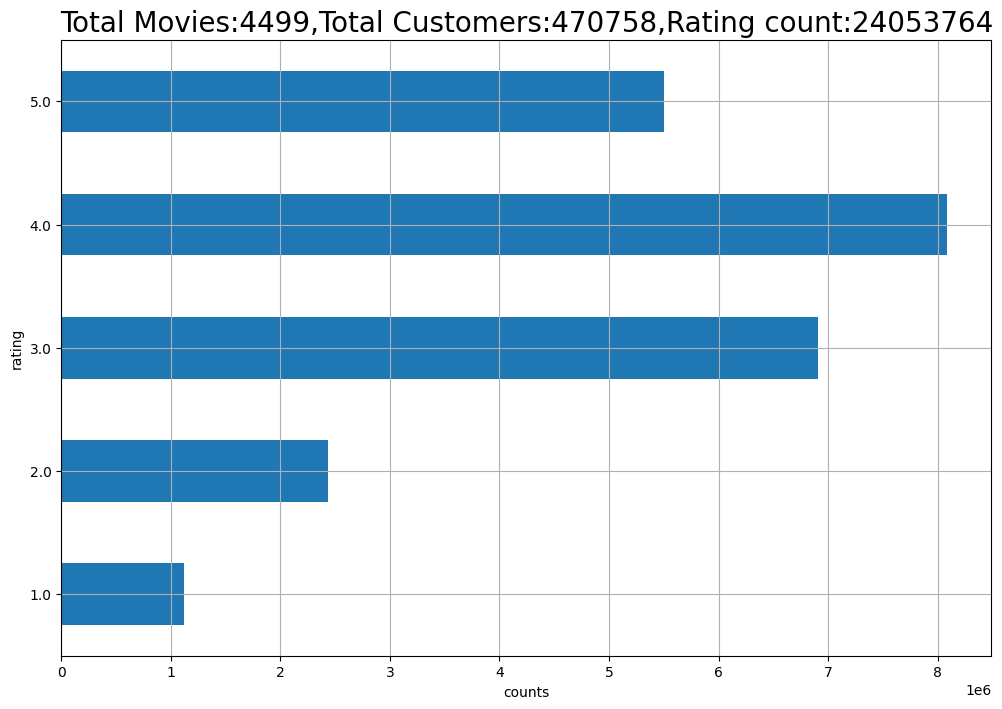

In [ ]:
ax=stars.plot(kind='barh',legend=False,figsize=(12,8))
plt.title(f'Total Movies:{movie_count},Total Customers:{customer_count},Rating count:{rating_count}',fontsize=20)
plt.grid(True)
plt.xlabel ('counts')
plt.show()

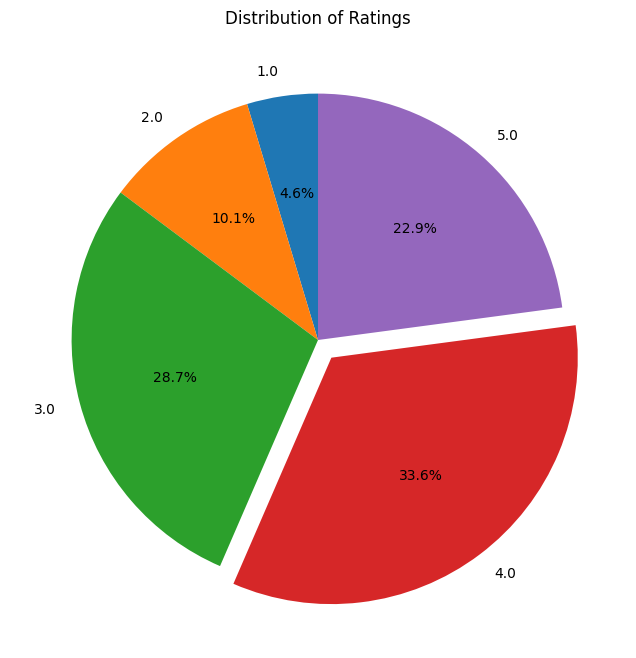

In [ ]:
#pieplot
# Create a pie plot
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
myexplode = [0, 0, 0, 0.09,0]
plt.pie(stars['count'], labels=stars.index, autopct='%1.1f%%',explode=myexplode, startangle=90)
plt.title('Distribution of Ratings')
plt.show()


**Inference:**


"User ratings on Netflix exhibit a positive skew, with Rating 4 (33.6%) being the most frequent, closely followed by Rating 3 (28.7%). Ratings 4 and 5 combined represent 56.5% of the total, indicating a strong overall positive sentiment. Users generally have favorable experiences with movies on Netflix, as negative ratings (1 and 2) are comparatively infrequent."

In [ ]:
# Let's just make a clear dataframe to find how many movie id are there
movie=None
movies=[] # Empty list to store movie id
for i in netflix_dataset.cust_ID:
  if ':'in i:
    movie=int(i.replace(':','')) # removing the : from the number
  movies.append(movie)# Adding the movie id number in the list



In [ ]:
movies

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
# create a column in dataset to store movie id
netflix_dataset['movie_id']=movies

In [ ]:
netflix_dataset

,cust_ID,rating,movie_id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
# It excludes the rows where the rating is Nan
netflix_dataset=netflix_dataset[netflix_dataset.rating.notna()]
netflix_dataset

,cust_ID,rating,movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cust_ID   object 
 1   rating    float64
 2   movie_id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
# change the datatype of cust id from object to int
netflix_dataset.cust_ID=netflix_dataset.cust_ID.astype(int)

/tmp/ipython-input-26-1880337559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset.cust_ID=netflix_dataset.cust_ID.astype(int)


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cust_ID   int64  
 1   rating    float64
 2   movie_id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


# Pre - filtering technique

To reduce noise , improve model accuracy , and optimize performance by removing sparse uninformative data before training the model

# Remove movies that were rated by very few users
These movies they don't have enough data to understand what kind of people like them

The model can't accurately position the movie in the latent (hidden) feature space

In [ ]:
# count the rating of movie id
df1=netflix_dataset.groupby('movie_id').rating.agg(['count'])
df1

,count
movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
movie_benchmark=round(df1['count'].quantile(0.6),0)
movie_benchmark

908.0

* 60 % of all movies were rated 908 times or less
* 40 % of movies were rated more that 908 times
* The 60th percentile is a values below which 60% of the data falls

**inference**

-Establishing a benchmark that model will only consider those movie IDs which have been rated by more than 908 people.

In [ ]:
# If any movie is having rating less than 908 exclude that movie
drop_movie_list=df1[df1['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='movie_id', length=2699)

# Remove all the users that have rated less movies

* These users don't provide enough data to understand their preferences

* The model can't reliably learn their taste or recommend meaningful content

In [ ]:
# Remove all the users that are inactive ( who have rated less number of movies )
df2=netflix_dataset.groupby('cust_ID')['rating'].agg(['count'])
df2

,count
cust_ID,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark=round(df2['count'].quantile(0.6),0)

In [ ]:
cust_benchmark

36.0

* 60% of users have rated 36 movies or fewer
* we will keep only the top 40% of users who are more active those who have   rated more that or equal to 36 movies

**inference**

-Establishing a benchmark that model will only consider those Cust_Id which have been rated more than 36 Movies.


In [ ]:
drop_customer_list=df2[df2['count']<cust_benchmark].index

In [ ]:
drop_customer_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='cust_ID', length=282042)

In [ ]:
# 1. Remove the movies that didn't meet the benchmark (less rated movies)
netflix_dataset=netflix_dataset[~netflix_dataset['movie_id'].isin(drop_movie_list)]
netflix_dataset

,cust_ID,rating,movie_id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
...,...,...,...
24056844,267802,4.0,4496
24056845,1559566,3.0,4496
24056846,293198,3.0,4496
24056847,70814,2.0,4496


In [ ]:
#2.removing all inactive users from our dataset
netflix_dataset=netflix_dataset[~netflix_dataset['cust_ID'].isin(drop_customer_list)]
netflix_dataset

,cust_ID,rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
netflix_dataset

,cust_ID,rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


**inference**

-Movie ID Extraction:The code extracts movie IDs from the 'Cust_Id' column and creates a new column named 'Movie_ID'.

-Handling Missing Values: Rows with missing values are dropped.

-Data Type Conversion: The 'Cust_Id' column is converted to an integer data type.

-Data Filtering: To improve model performance and focus on relevant data, the dataset is further filtered. Movies with fewer ratings than a certain benchmark are excluded, as well as customers who have rated fewer movies than a specified benchmark.

# Model Implementation
**To load the movie_titles**



In [ ]:
movies_title=pd.read_csv('/content/drive/MyDrive/Netflix dataset/Copy of movie_titles.csv',encoding='ISO-8859-1',header=None,names=['movie_id','year','name'],usecols=[0,1,2])

In [ ]:
movies_title

,movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
!pip install numpy==1.23.5

In [ ]:
!pip install scikit-surprise

In [ ]:
from surprise import Reader,Dataset,SVD #Reader & Dataset convert data into Svd model readable format.
from surprise.model_selection import cross_validate

In [ ]:
reader=Reader()

In [ ]:
# We only work with the top 200k records for quick runtime
data=Dataset.load_from_df(netflix_dataset[['cust_ID','movie_id','rating']][:200000],reader)

In [ ]:
 data

In [ ]:
model=SVD() # creating a SVD model

In [ ]:
# Compute the RMSE of the SVD algorithm
cross_validate(model,data,measures=['RMSE'],cv=3)

{'test_rmse': array([0.9931444 , 0.99457856, 0.99728162]),
 'fit_time': (2.785634994506836, 3.7108314037323, 2.7755024433135986),
 'test_time': (0.43648838996887207, 0.7154366970062256, 0.7806034088134766)}

**inference**

The RMSE values ranges from approximately 0.9931 to 0.9972.Metrices suggests that SVD algorithm is making reasonble accurate predictions,given the relatively low error rates

In [ ]:
#train the model with data
trainset=data.build_full_trainset()
model.fit(trainset)


# Recomendation part

In [ ]:
# Filter the data for finding a specific user 712664 to whom we are going to suggest the movie
user_rating=netflix_dataset[netflix_dataset['cust_ID']==712664]
user_rating.count()

,cust_ID,rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


**inference**

user 712664 have rateed 383 movies

In [ ]:
# Make a copy of each individual customer for recommendation
user_712664=movies_title.copy()

In [ ]:
user_712664

,movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# Remove the less rated movies from the 2nd dataset also
user_712664=user_712664[~user_712664['movie_id'].isin(drop_movie_list)]
user_712664

,movie_id,year,name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# find the movies ,user 712664 already rated
rated_movies=netflix_dataset[netflix_dataset['cust_ID']==712664].movie_id
rated_movies

,movie_id
696,3
31456,18
46415,26
290337,77
303936,78
...,...
23499778,4393
23546479,4402
23649414,4432
23836676,4465


In [ ]:
## Remove the already rated  movies from the 2nd dataset also
user_712664=user_712664[~user_712664['movie_id'].isin(rated_movies)]
user_712664

,movie_id,year,name
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# predicting the rating for a specific user 1331154 across all movies by creating extra column Estimation Rating
user_712664['Estimation rating']=user_712664['movie_id'].apply(lambda x: model.predict(712664,x).est)

/tmp/ipython-input-76-3141600220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimation rating']=user_712664['movie_id'].apply(lambda x: model.predict(712664,x).est)


In [ ]:
# Display the top 5 movies with the highest estimates score that user 712664 can like

recomended_movies=user_712664.sort_values('Estimation rating',ascending=False).head(5)
recomended_movies

,movie_id,year,name,Estimation rating
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.337910
51,52,2002.0,The Weather Underground,4.148733
32,33,2000.0,Aqua Teen Hunger Force: Vol. 1,4.099519
47,48,2001.0,Justice League,4.063212
29,30,2003.0,Something's Gotta Give,3.963498


In [ ]:
#This performs 3-fold cross-validation and calculates the average RMSE.
results=cross_validate(model,data,measures=['RMSE'],  cv=3)
average_rmse=np.mean(results['test_rmse'])#Average the test RMSE values.
print(f'Average RMSE: {average_rmse}')

Average RMSE: 0.9958477158686084


# Conclusion
This project successfully implemented a movie recommendation system for the Netflix dataset using Singular Value Decomposition (SVD). The model achieved a reasonable RMSE score of [0.9958] during cross-validation. The recommendations generated for a sample user (ID 712664) appeared relevant and aligned with their past ratings.